## The problem statement : **Next Word prediction using LSTM**


# Project Overivew : 

Ths prooject aims to develop a deep learning model for predicting the next word in a given seuence of words. The model is built using Login Short-Term Memory(LSTM) networks which are well-suited for sequence predicction tasksThe project includes the following steps : 

1- Data Collection: We use the text of Shakespeare's "Hamlet" as our dataset. This rich, complex text provides a good challenge for our model.

2- Data Preprocessing: The text data is tokenized, converted into sequences, and padded to ensure uniform input lengths. The sequences are then split into training and testing sets.

3- Model Building: An LSTM model is constructed with an embedding layer, two LSTM layers, and a dense output layer with a softmax activation function to predict the probability of the next word.

4- Model Training: The model is trained using the prepared sequences, with early stopping implemented to prevent overfitting. Early stopping monitors the validation loss and stops training when the loss stops improving.

5- Model Evaluation: The model is evaluated using a set of example sentences to test its ability to predict the next word accurately.

6- Deployment: A Streamlit web application is developed to allow users to input a sequence of words and get the predicted next word in real-time.

In [2]:
import nltk
nltk.download('gutenberg')
from nltk.corpus import gutenberg
import pandas as pd


data = gutenberg.raw('shakespeare-hamlet.txt')
with open('hamlet.txt','w') as file:
    file.write(data) 

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\sakth\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [3]:
## Data preprocessing

import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split



#load the dataset

with open('hamlet.txt','r') as file:
    text = file.read().lower()
##Tokenize the text-creating indexes for words
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1
total_words

4818

In [4]:
tokenizer.word_index

{'the': 1,
 'and': 2,
 'to': 3,
 'of': 4,
 'i': 5,
 'you': 6,
 'a': 7,
 'my': 8,
 'it': 9,
 'in': 10,
 'that': 11,
 'ham': 12,
 'is': 13,
 'not': 14,
 'his': 15,
 'this': 16,
 'with': 17,
 'your': 18,
 'but': 19,
 'for': 20,
 'me': 21,
 'lord': 22,
 'as': 23,
 'what': 24,
 'he': 25,
 'be': 26,
 'so': 27,
 'him': 28,
 'haue': 29,
 'king': 30,
 'will': 31,
 'no': 32,
 'our': 33,
 'we': 34,
 'on': 35,
 'are': 36,
 'if': 37,
 'all': 38,
 'then': 39,
 'shall': 40,
 'by': 41,
 'thou': 42,
 'come': 43,
 'or': 44,
 'hamlet': 45,
 'good': 46,
 'do': 47,
 'hor': 48,
 'her': 49,
 'let': 50,
 'now': 51,
 'thy': 52,
 'how': 53,
 'more': 54,
 'they': 55,
 'from': 56,
 'enter': 57,
 'at': 58,
 'was': 59,
 'oh': 60,
 'like': 61,
 'most': 62,
 'there': 63,
 'well': 64,
 'know': 65,
 'selfe': 66,
 'would': 67,
 'them': 68,
 'loue': 69,
 'may': 70,
 "'tis": 71,
 'vs': 72,
 'sir': 73,
 'qu': 74,
 'which': 75,
 'did': 76,
 'why': 77,
 'laer': 78,
 'giue': 79,
 'thee': 80,
 'ile': 81,
 'must': 82,
 'hath': 

In [5]:
tokenizer.word_counts

OrderedDict([('the', 993),
             ('tragedie', 4),
             ('of', 610),
             ('hamlet', 100),
             ('by', 105),
             ('william', 1),
             ('shakespeare', 1),
             ('1599', 1),
             ('actus', 2),
             ('primus', 1),
             ('scoena', 1),
             ('prima', 1),
             ('enter', 85),
             ('barnardo', 8),
             ('and', 862),
             ('francisco', 2),
             ('two', 22),
             ('centinels', 1),
             ("who's", 2),
             ('there', 76),
             ('fran', 8),
             ('nay', 26),
             ('answer', 9),
             ('me', 228),
             ('stand', 15),
             ('vnfold', 3),
             ('your', 253),
             ('selfe', 68),
             ('bar', 7),
             ('long', 17),
             ('liue', 15),
             ('king', 171),
             ('he', 196),
             ('you', 522),
             ('come', 104),
             ('most', 77),
  

In [6]:
tokenizer.word_docs

defaultdict(int,
            {'miching': 1,
             'crew': 1,
             'scoenes': 1,
             'oddes': 1,
             'modesties': 1,
             'plaine': 1,
             'personall': 1,
             'dugge': 1,
             'try': 1,
             'except': 1,
             'singeth': 1,
             'twaine': 1,
             'padling': 1,
             'messenger': 1,
             'wherefore': 1,
             'platforme': 1,
             'alarum': 1,
             'paiocke': 1,
             'cups': 1,
             'they': 1,
             'highnesse': 1,
             'vanisht': 1,
             'guards': 1,
             'vilde': 1,
             'encounter': 1,
             'bait': 1,
             'recklesse': 1,
             'kites': 1,
             'blanke': 1,
             "imbark't": 1,
             'smooth': 1,
             'instrument': 1,
             'sing': 1,
             'struck': 1,
             'dirge': 1,
             "plaist'ring": 1,
             'vnshaken':

In [7]:
# creating an input sequences
inputsequences = []
for line in text.split('\n'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in  range(1,len(token_list)):
        n_gram_sequences = token_list[:i+1]
        inputsequences.append(n_gram_sequences)


In [8]:
inputsequences

[[1, 687],
 [1, 687, 4],
 [1, 687, 4, 45],
 [1, 687, 4, 45, 41],
 [1, 687, 4, 45, 41, 1886],
 [1, 687, 4, 45, 41, 1886, 1887],
 [1, 687, 4, 45, 41, 1886, 1887, 1888],
 [1180, 1889],
 [1180, 1889, 1890],
 [1180, 1889, 1890, 1891],
 [57, 407],
 [57, 407, 2],
 [57, 407, 2, 1181],
 [57, 407, 2, 1181, 177],
 [57, 407, 2, 1181, 177, 1892],
 [407, 1182],
 [407, 1182, 63],
 [408, 162],
 [408, 162, 377],
 [408, 162, 377, 21],
 [408, 162, 377, 21, 247],
 [408, 162, 377, 21, 247, 882],
 [18, 66],
 [451, 224],
 [451, 224, 248],
 [451, 224, 248, 1],
 [451, 224, 248, 1, 30],
 [408, 407],
 [451, 25],
 [408, 6],
 [408, 6, 43],
 [408, 6, 43, 62],
 [408, 6, 43, 62, 1893],
 [408, 6, 43, 62, 1893, 96],
 [408, 6, 43, 62, 1893, 96, 18],
 [408, 6, 43, 62, 1893, 96, 18, 566],
 [451, 71],
 [451, 71, 51],
 [451, 71, 51, 1894],
 [451, 71, 51, 1894, 567],
 [451, 71, 51, 1894, 567, 378],
 [451, 71, 51, 1894, 567, 378, 80],
 [451, 71, 51, 1894, 567, 378, 80, 3],
 [451, 71, 51, 1894, 567, 378, 80, 3, 273],
 [451, 71

In [9]:
max_sequence_len = max([len(x) for x in inputsequences])
max_sequence_len

14

In [10]:
inputsequences = np.array(pad_sequences(inputsequences,maxlen=max_sequence_len,padding='pre'))
inputsequences

array([[   0,    0,    0, ...,    0,    1,  687],
       [   0,    0,    0, ...,    1,  687,    4],
       [   0,    0,    0, ...,  687,    4,   45],
       ...,
       [   0,    0,    0, ...,    4,   45, 1047],
       [   0,    0,    0, ...,   45, 1047,    4],
       [   0,    0,    0, ..., 1047,    4,  193]])

In [11]:
## Create predicitors and label
import tensorflow as tf

x,y = inputsequences[:,:-1],inputsequences[:,-1]


In [12]:
x

array([[   0,    0,    0, ...,    0,    0,    1],
       [   0,    0,    0, ...,    0,    1,  687],
       [   0,    0,    0, ...,    1,  687,    4],
       ...,
       [   0,    0,    0, ...,  687,    4,   45],
       [   0,    0,    0, ...,    4,   45, 1047],
       [   0,    0,    0, ...,   45, 1047,    4]])

In [13]:
y

array([ 687,    4,   45, ..., 1047,    4,  193])

In [14]:
y = tf.keras.utils.to_categorical(y,num_classes=total_words)

In [15]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [17]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor = "val_loss",patience = 3,restore_best_weights = True)


In [19]:
## Train lstm rnn

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout


#Denfine the model

model = Sequential()
model.add(Embedding(total_words,100,input_length = max_sequence_len-1))
model.add(LSTM(150,return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(100))
model.add(Dense(total_words,activation = "softmax"))


#complie the model
model.compile(loss = "categorical_crossentropy",optimizer = 'adam',metrics = ['accuracy'])




In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 13, 100)           481800    
                                                                 
 lstm (LSTM)                 (None, 13, 150)           150600    
                                                                 
 dropout (Dropout)           (None, 13, 150)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               100400    
                                                                 
 dense (Dense)               (None, 4818)              486618    
                                                                 
Total params: 1,219,418
Trainable params: 1,219,418
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train with smaller batch size
history = model.fit(x_train, y_train, epochs=50, 
                    validation_data=(x_test, y_test), 
                    verbose=1, 
                   
)

Epoch 1/50
644/644 [==============================] - 8s 13ms/step - loss: 6.0380 - accuracy: 0.0508 - val_loss: 7.3041 - val_accuracy: 0.0480
Epoch 2/50
644/644 [==============================] - 8s 12ms/step - loss: 5.9024 - accuracy: 0.0550 - val_loss: 7.4085 - val_accuracy: 0.0476
Epoch 3/50
644/644 [==============================] - 8s 12ms/step - loss: 5.7836 - accuracy: 0.0605 - val_loss: 7.4851 - val_accuracy: 0.0552
Epoch 4/50
644/644 [==============================] - 8s 12ms/step - loss: 5.6573 - accuracy: 0.0675 - val_loss: 7.5855 - val_accuracy: 0.0569
Epoch 5/50
644/644 [==============================] - 8s 12ms/step - loss: 5.5305 - accuracy: 0.0738 - val_loss: 7.6601 - val_accuracy: 0.0587
Epoch 6/50
644/644 [==============================] - 8s 12ms/step - loss: 5.4105 - accuracy: 0.0784 - val_loss: 7.7573 - val_accuracy: 0.0659
Epoch 7/50
644/644 [==============================] - 8s 12ms/step - loss: 5.2990 - accuracy: 0.0836 - val_loss: 7.8586 - val_accuracy: 0.0641

In [26]:
# Train with smaller batch size
history = model.fit(x_train, y_train, epochs=80, 
                    validation_data=(x_test, y_test), 
                    verbose=1, 
                   
)

Epoch 1/80
644/644 [==============================] - 8s 13ms/step - loss: 2.7553 - accuracy: 0.4004 - val_loss: 12.0017 - val_accuracy: 0.0546
Epoch 2/80
644/644 [==============================] - 8s 12ms/step - loss: 2.7307 - accuracy: 0.4018 - val_loss: 12.0675 - val_accuracy: 0.0507
Epoch 3/80
644/644 [==============================] - 8s 12ms/step - loss: 2.6977 - accuracy: 0.4105 - val_loss: 12.1456 - val_accuracy: 0.0532
Epoch 4/80
644/644 [==============================] - 8s 12ms/step - loss: 2.6691 - accuracy: 0.4167 - val_loss: 12.2098 - val_accuracy: 0.0548
Epoch 5/80
644/644 [==============================] - 8s 12ms/step - loss: 2.6386 - accuracy: 0.4233 - val_loss: 12.2640 - val_accuracy: 0.0519
Epoch 6/80
644/644 [==============================] - 8s 12ms/step - loss: 2.6139 - accuracy: 0.4260 - val_loss: 12.3258 - val_accuracy: 0.0511
Epoch 7/80
644/644 [==============================] - 8s 12ms/step - loss: 2.5821 - accuracy: 0.4343 - val_loss: 12.3939 - val_accuracy:

TensorFlow version: 2.10.1
GPU detected: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Loading Shakespeare data...
Text length: 1115394 characters

Preprocessed text length: 1154932 characters
Sample text: first citizen : before we proceed any further , hear me speak . all : speak , speak . first citizen : you are all resolved rather to die than to famish ? all : resolved . resolved . first citizen : first , you know caius marcius is chief enemy to the people . all : we know't , we know't . first citizen : let us kill him , and we'll have corn at our own price . is't a verdict ? all : no more talking on't ; let it be done : away , away ! second citizen : one word , good citizens . first citizen : 
Created 50000 sequences

Total words in vocabulary: 5000
Top 20 words: ['<OOV>', ',', ':', '.', 'the', 'and', 'to', 'of', 'i', ';', 'my', 'you', 'that', 'a', 'in', '?', '!', 'is', 'not', 'with']
Created 50000 training examples

X shape: (50000, 9)
y shape: (50000,)

Trai

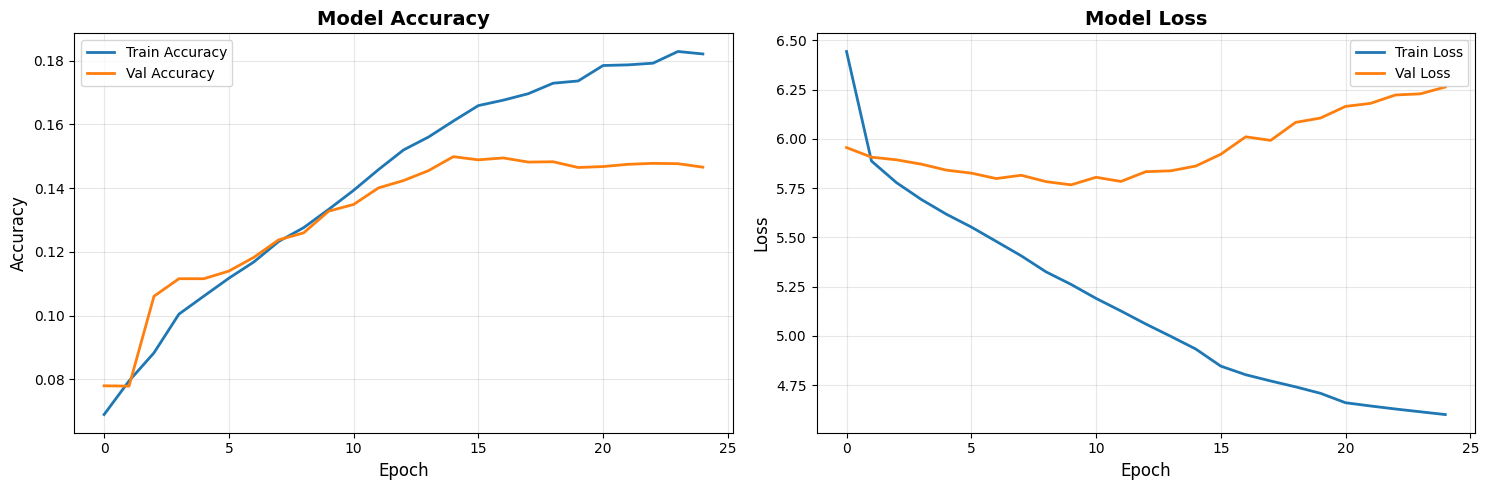


Saving model and artifacts...
All artifacts saved successfully!

INTERACTIVE TEXT GENERATION
Enter seed text and generate Shakespeare-like text
Type 'quit' to exit

------------------------------------------------------------
Please enter valid numbers

------------------------------------------------------------
Please enter valid numbers

------------------------------------------------------------
Please enter at least 2 words as seed text

------------------------------------------------------------
Goodbye!


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import re
import urllib.request
import os

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Check for GPU
print("TensorFlow version:", tf.__version__)
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"GPU detected: {gpus}")
else:
    print("No GPU detected, using CPU")

# 1. LOAD DATA
print("\nLoading Shakespeare data...")
file_path = "shakespeare.txt"

with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

print(f"Text length: {len(text)} characters")

# 2. IMPROVED TEXT PREPROCESSING
def preprocess_text(text):
    """Clean and preprocess the text more aggressively"""
    # Lowercase
    text = text.lower()
    
    # Remove stage directions and character names (they start with uppercase and colon)
    text = re.sub(r'^[A-Z][A-Z\s]+:', ' ', text, flags=re.MULTILINE)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text)
    
    # Remove special characters but keep basic punctuation
    text = re.sub(r'[^a-z0-9\s.,!?;:\'"-]', '', text)
    
    # Add spaces around punctuation for better tokenization
    text = re.sub(r'([.,!?;:"])', r' \1 ', text)
    
    # Clean up extra spaces
    text = re.sub(r'\s+', ' ', text)
    
    return text.strip()

text = preprocess_text(text)
print(f"\nPreprocessed text length: {len(text)} characters")
print(f"Sample text: {text[:500]}")

# 3. CREATE SEQUENCES WITH BETTER STRATEGY
def create_sequences(text, seq_length=10, step=1):
    """Create overlapping sequences from text"""
    words = text.split()
    sequences = []
    
    # Limit total sequences to avoid memory issues
    max_total_sequences = 50000
    
    # Create overlapping sequences
    for i in range(0, min(len(words) - seq_length, max_total_sequences * step), step):
        seq = words[i:i + seq_length]
        sequences.append(' '.join(seq))
    
    print(f"Created {len(sequences)} sequences")
    return sequences

# Adjusted parameters for better learning
seq_length = 10  # Increased for more context
step = 2  # Reduced overlap
sequences = create_sequences(text, seq_length=seq_length, step=step)

# 4. TOKENIZE WITH IMPROVED VOCABULARY
vocab_size = 5000  # Increased vocabulary
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>", filters='')
tokenizer.fit_on_texts(sequences)
total_words = min(vocab_size, len(tokenizer.word_index) + 1)

print(f"\nTotal words in vocabulary: {total_words}")
print(f"Top 20 words: {list(tokenizer.word_index.keys())[:20]}")

# 5. CREATE TRAINING DATA MORE EFFICIENTLY
def create_training_data_efficient(sequences, tokenizer, seq_length, max_examples=200000):
    """Create training data more efficiently"""
    X = []
    y = []
    
    for sequence in sequences[:min(len(sequences), max_examples)]:
        token_list = tokenizer.texts_to_sequences([sequence])[0]
        
        if len(token_list) == seq_length:
            # Use all but last token as input, last token as output
            X.append(token_list[:-1])
            y.append(token_list[-1])
    
    print(f"Created {len(X)} training examples")
    return np.array(X), np.array(y)

# Create training data
X, y = create_training_data_efficient(sequences, tokenizer, seq_length, max_examples=100000)

print(f"\nX shape: {X.shape}")
print(f"y shape: {y.shape}")

# 6. SPLIT DATA
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print(f"\nTraining samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

# 7. OPTIMIZED MODEL ARCHITECTURE
def build_optimized_model(total_words, max_seq_len):
    """Build a more efficient model"""
    model = Sequential([
        # Embedding layer
        Embedding(
            input_dim=total_words,
            output_dim=128,  # Increased embedding dimension
            input_length=max_seq_len,
            mask_zero=False  # Set to False for better CuDNN compatibility
        ),
        
        # Single LSTM layer (removed bidirectional for simplicity)
        LSTM(
            256,
            dropout=0.3,
            recurrent_dropout=0.3,
            return_sequences=False
        ),
        
        # Dense layers
        Dense(128, activation='relu'),
        Dropout(0.4),
        
        Dense(64, activation='relu'),
        Dropout(0.4),
        
        # Output layer
        Dense(total_words, activation='softmax')
    ])
    
    # Compile with better optimizer settings
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        metrics=['accuracy']
    )
    
    return model

# Build the model
model = build_optimized_model(total_words, X.shape[1])
model.summary()

# 8. IMPROVED CALLBACKS
callbacks = [
    EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True,
        min_delta=0.001
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=0.00001,
        verbose=1
    ),
    ModelCheckpoint(
        'best_shakespeare_model.keras',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    )
]

# 9. TRAIN WITH BETTER SETTINGS
print("\nTraining optimized model...")

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=256,  # Increased batch size
    validation_data=(X_test, y_test),
    callbacks=callbacks,
    verbose=1,
    shuffle=True
)

# 10. IMPROVED TEXT GENERATION FUNCTION
def generate_text_improved(seed_text, next_words=50, temperature=0.8, diversity=0.5):
    """Generate text with better sampling"""
    generated_text = seed_text
    
    for _ in range(next_words):
        # Tokenize
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        
        # Keep only last (seq_length-1) tokens for context
        if len(token_list) > seq_length - 1:
            token_list = token_list[-(seq_length - 1):]
        
        # Pad
        token_list = pad_sequences([token_list], maxlen=X.shape[1], padding='pre')
        
        # Predict
        predictions = model.predict(token_list, verbose=0)[0]
        
        # Apply temperature sampling
        predictions = np.asarray(predictions).astype('float64')
        predictions = np.log(predictions + 1e-7) / temperature
        exp_preds = np.exp(predictions)
        predictions = exp_preds / np.sum(exp_preds)
        
        # Add some diversity by favoring less likely words occasionally
        if np.random.random() < diversity:
            predicted_id = np.random.choice(len(predictions), p=predictions)
        else:
            predicted_id = np.argmax(predictions)
        
        # Get word
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted_id and index < total_words:
                output_word = word
                break
        
        if output_word == "":
            output_word = "<OOV>"
        
        # Update text
        seed_text += " " + output_word
        generated_text += " " + output_word
        
        # Stop if we get multiple OOVs in a row
        if generated_text.count("<OOV> <OOV>") > 1:
            break
    
    return generated_text

# 11. TEST GENERATION
print("\n" + "="*60)
print("TEXT GENERATION RESULTS")
print("="*60)

test_seeds = [
    "to be or not to be",
    "shall i compare thee to",
    "romeo wherefore art thou",
    "all the world is a",
    "if music be the food of",
    "now is the winter of our",
    "parting is such sweet",
    "what light through yonder",
    "a horse a horse my kingdom",
    "to thine own self be true"
]

for i, seed in enumerate(test_seeds, 1):
    print(f"\nExample {i}:")
    print(f"Seed: '{seed}'")
    
    # Try different temperatures
    for temp in [0.5, 0.7, 1.0]:
        generated = generate_text_improved(seed, next_words=20, temperature=temp)
        print(f"Temp {temp}: {generated}")
    print("-" * 40)

# 12. EVALUATION AND VISUALIZATION
print("\n" + "="*60)
print("MODEL EVALUATION")
print("="*60)

# Evaluate final model
final_loss, final_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Final Test Accuracy: {final_accuracy:.4f}")
print(f"Final Test Loss: {final_loss:.4f}")

# Plot results
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Val Accuracy', linewidth=2)
plt.title('Model Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Val Loss', linewidth=2)
plt.title('Model Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 13. SAVE EVERYTHING
print("\nSaving model and artifacts...")
model.save('optimized_shakespeare_generator.keras')

import pickle
with open('optimized_tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

# Save training parameters
training_params = {
    'seq_length': seq_length,
    'vocab_size': vocab_size,
    'total_words': total_words,
    'max_seq_len': X.shape[1],
    'final_accuracy': final_accuracy,
    'final_loss': final_loss
}

import json
with open('training_params.json', 'w') as f:
    json.dump(training_params, f, indent=2)

print("All artifacts saved successfully!")

# 14. INTERACTIVE MODE
def interactive_mode():
    """Run in interactive mode for text generation"""
    print("\n" + "="*60)
    print("INTERACTIVE TEXT GENERATION")
    print("="*60)
    print("Enter seed text and generate Shakespeare-like text")
    print("Type 'quit' to exit")
    
    while True:
        print("\n" + "-"*60)
        seed_text = input("\nEnter seed text: ").strip().lower()
        
        if seed_text.lower() == 'quit':
            print("Goodbye!")
            break
        
        if len(seed_text.split()) < 2:
            print("Please enter at least 2 words as seed text")
            continue
        
        try:
            num_words = int(input("Number of words to generate (default: 30): ") or "30")
            temperature = float(input("Temperature (0.1-2.0, default: 0.8): ") or "0.8")
            
            print("\n" + "="*60)
            print("GENERATING TEXT...")
            print("="*60)
            
            result = generate_text_improved(seed_text, next_words=num_words, temperature=temperature)
            
            print("\nRESULT:")
            print("-" * 40)
            print(result)
            print("-" * 40)
            
            # Ask if user wants to continue
            cont = input("\nGenerate more? (y/n): ").lower()
            if cont != 'y':
                print("Goodbye!")
                break
                
        except ValueError:
            print("Please enter valid numbers")
        except Exception as e:
            print(f"Error: {e}")

# Uncomment to run interactive mode
interactive_mode()

In [5]:
model.save('shakespeare_model.h5')
print("Model saved as 'shakespeare_model.h5'")

Model saved as 'shakespeare_model.h5'


In [6]:
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
print("Tokenizer saved as 'tokenizer.pickle'")

Tokenizer saved as 'tokenizer.pickle'
